In [55]:
from qiskit.circuit import QuantumCircuit
from math import pi
from qiskit.circuit.library import U3Gate

In [56]:
RnGate = [U3Gate(theta=0.0,phi=0.0,lam=2*pi/2**k,label='R'+str(k)) for k in range(0,6,1)] #1用不上 只是方便记
RnGate_controlled =[ i.control(num_ctrl_qubits=1,label=i.label+'C',ctrl_state=1) for i in RnGate]

### 1.构造QFT

In [57]:
QFT = QuantumCircuit(4)
QFT.h(0)
QFT.append(RnGate_controlled[2],[1,0])
QFT.append(RnGate_controlled[3],[2,0])
QFT.append(RnGate_controlled[4],[3,0])
QFT.barrier()
QFT.h(1)
##
QFT.append(RnGate_controlled[2],[2,1])
QFT.append(RnGate_controlled[3],[3,1])
QFT.barrier()
QFT.h(2)
QFT.append(RnGate_controlled[2],[3,2])
QFT.barrier()
QFT.h(3)
QFT.barrier()
QFT.swap(0,3)
QFT.swap(1,2)
QFT = QFT.to_instruction()

In [58]:
target = list(range(2,4+1))
print(target)

[2, 3, 4]


### 验证dagger QFT

In [59]:
QFT
QFT_REVERSE = QFT.reverse_ops()
QFT_INVERSE = QFT.inverse() #inverse是QFT_dagger
QFT_INVERSE.name='QFT_dagger'

### 2.QPE

In [60]:
U = U3Gate(theta=0.0,phi=0.0,lam=pi/2)
U.to_matrix()

array([[1.000000e+00+0.j, 0.000000e+00-0.j],
       [0.000000e+00+0.j, 6.123234e-17+1.j]])

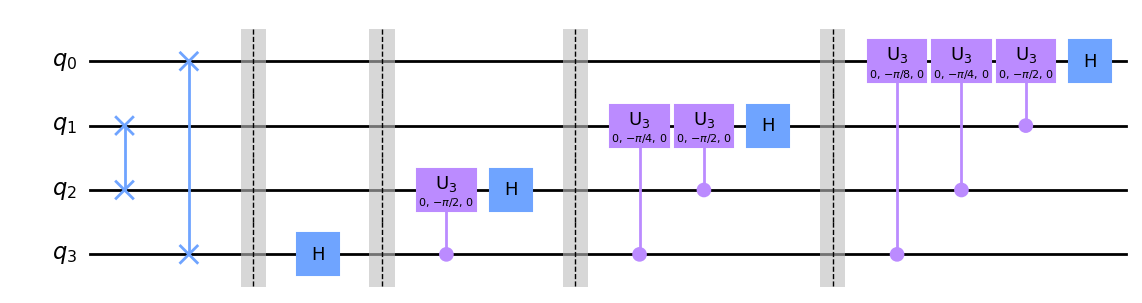

In [63]:
qc = QuantumCircuit(4)
qc.append(QFT_INVERSE,range(0,4))
display(qc.decompose().draw('mpl'))

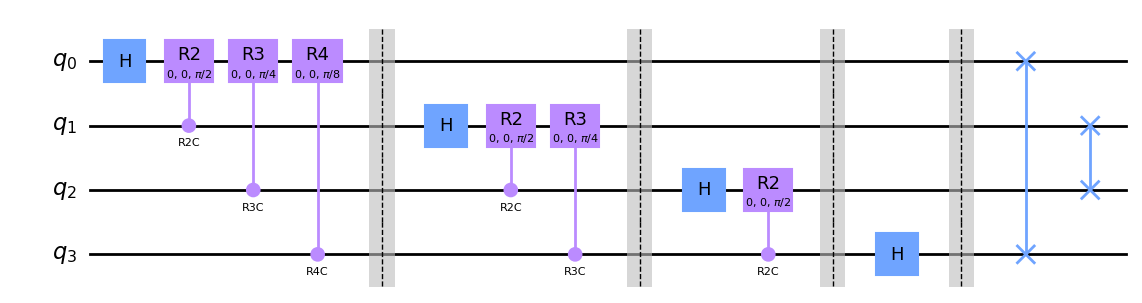

In [64]:
qc = QuantumCircuit(4)
qc.append(QFT,range(0,4))
display(qc.decompose().draw('mpl'))

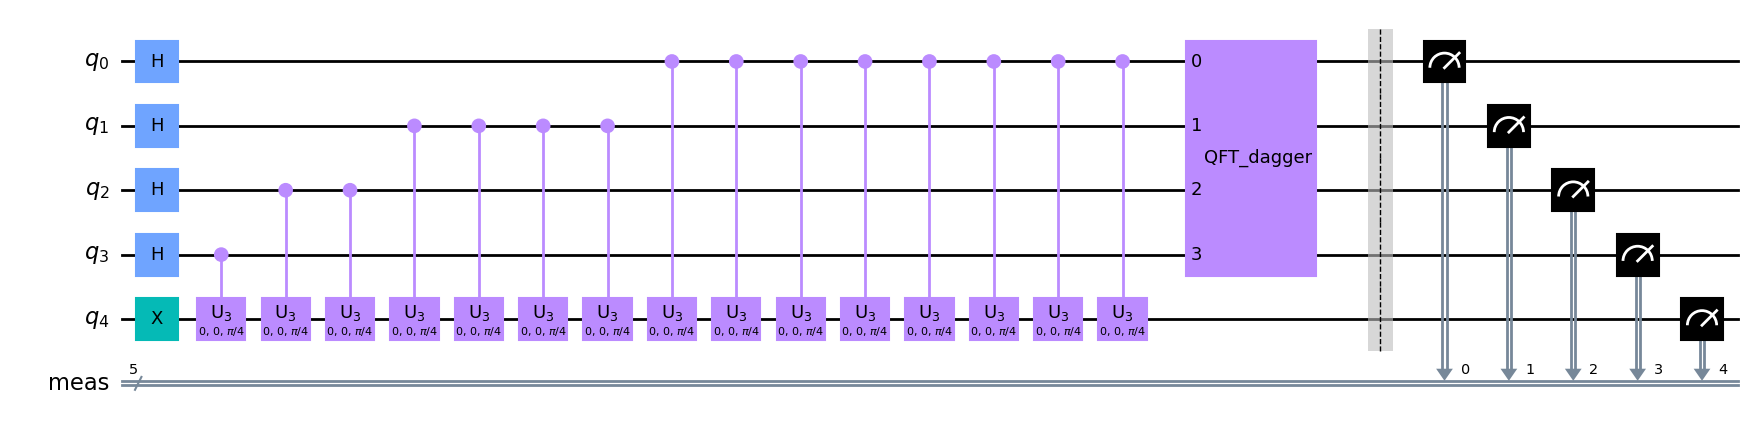

In [65]:
import warnings
warnings.filterwarnings("ignore")
qc = QuantumCircuit(5)
qc.h([0,1,2,3])
qc.x(4)
####
qc.cu3(theta=0.0,phi=0.0,lam=pi/4,target_qubit=4,control_qubit=3)
qc.cu3(theta=0.0,phi=0.0,lam=pi/4,target_qubit=4,control_qubit=2)
qc.cu3(theta=0.0,phi=0.0,lam=pi/4,target_qubit=4,control_qubit=2)
qc.cu3(theta=0.0,phi=0.0,lam=pi/4,target_qubit=4,control_qubit=1)
qc.cu3(theta=0.0,phi=0.0,lam=pi/4,target_qubit=4,control_qubit=1)
qc.cu3(theta=0.0,phi=0.0,lam=pi/4,target_qubit=4,control_qubit=1)
qc.cu3(theta=0.0,phi=0.0,lam=pi/4,target_qubit=4,control_qubit=1)
##
qc.cu3(theta=0.0,phi=0.0,lam=pi/4,target_qubit=4,control_qubit=0)
qc.cu3(theta=0.0,phi=0.0,lam=pi/4,target_qubit=4,control_qubit=0)
qc.cu3(theta=0.0,phi=0.0,lam=pi/4,target_qubit=4,control_qubit=0)
qc.cu3(theta=0.0,phi=0.0,lam=pi/4,target_qubit=4,control_qubit=0)
qc.cu3(theta=0.0,phi=0.0,lam=pi/4,target_qubit=4,control_qubit=0)
qc.cu3(theta=0.0,phi=0.0,lam=pi/4,target_qubit=4,control_qubit=0)
qc.cu3(theta=0.0,phi=0.0,lam=pi/4,target_qubit=4,control_qubit=0)
qc.cu3(theta=0.0,phi=0.0,lam=pi/4,target_qubit=4,control_qubit=0)

##
qc.append(QFT_INVERSE,range(0,4))
##
qc.measure_all()
display(qc.draw('mpl'))

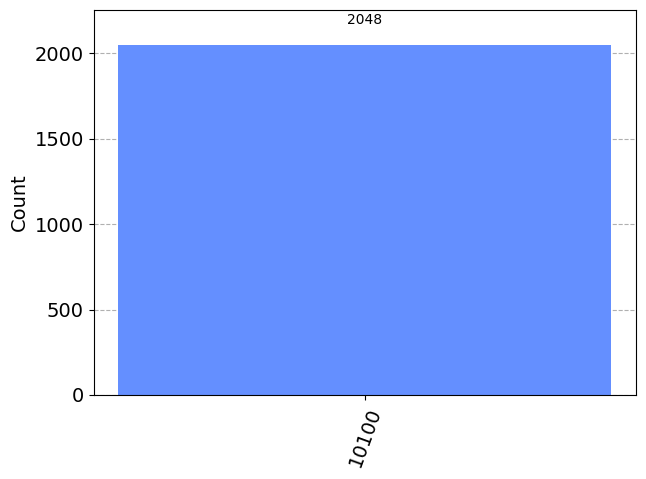

In [66]:
from qiskit.primitives import Estimator
from qiskit import execute
from qiskit.visualization import plot_histogram
from qiskit_aer import Aer
backend= Aer.get_backend('qasm_simulator')
job =execute(experiments=qc,shots=2048,backend=backend)
result = job.result()
answer = result.get_counts()
plot_histogram(answer)

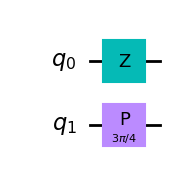

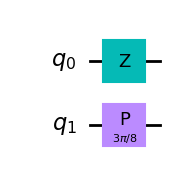

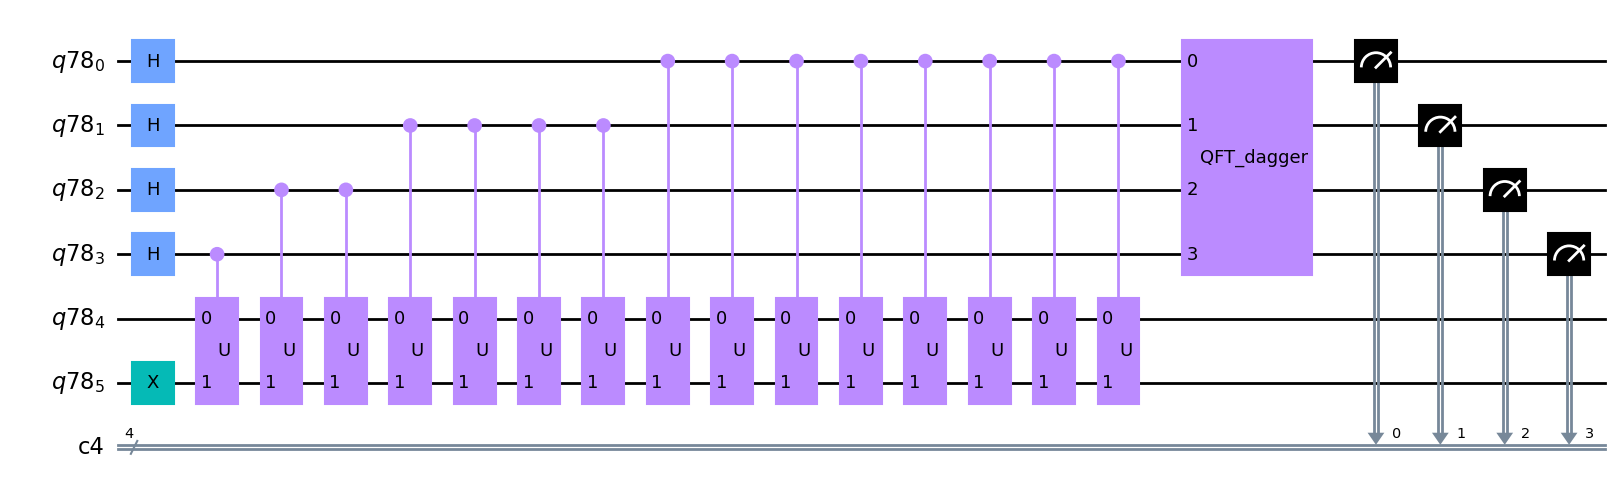

In [67]:
from qiskit.quantum_info import Statevector
from qiskit.circuit import ClassicalRegister,QuantumRegister
circuit = QuantumCircuit(2)
# define the matrix and its eigenstate || U * psi = exp(i*phi)* psi
circuit.z(0)
circuit.p(3/8*pi,1)
display(circuit.draw('mpl'))
U = circuit.to_gate(label='U')
U_control = U.control(num_ctrl_qubits=1,ctrl_state=1)
U_c = circuit.to_instruction()
#######
classic = ClassicalRegister(4)
quantum = QuantumRegister(4+2)
circuit = QuantumCircuit(quantum,classic)
circuit.h(range(4))
circuit.x(5)
circuit.append(U_control,[3,4,5])
circuit.append(U_control,[2,4,5])
circuit.append(U_control,[2,4,5])
[circuit.append(U_control,[1,4,5]) for i in range(4)]
[circuit.append(U_control,[0,4,5]) for i in range(8)]
circuit.append(QFT_INVERSE,range(4))
circuit.measure([0,1,2,3],[0,1,2,3])
display(circuit.draw('mpl'))

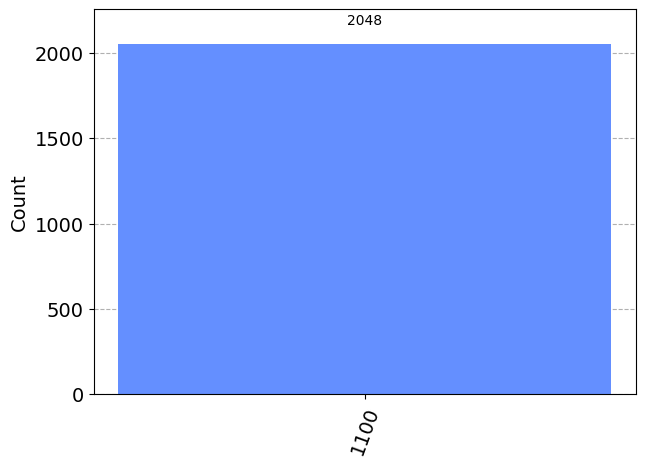

In [68]:
backend= Aer.get_backend('qasm_simulator')
job =execute(experiments=circuit,shots=2048,backend=backend)
result = job.result()
answer = result.get_counts()
plot_histogram(answer)

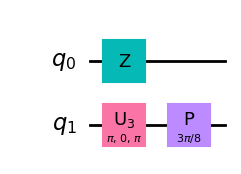

In [46]:
qc = QuantumCircuit(2)
qc.x(1)
qc.append(U,[0,1])
state = Statevector(data=qc)
display(qc.decompose().draw('mpl'))

In [54]:
from qiskit.visualization import array_to_latex
a =array_to_latex(state)
a

<IPython.core.display.Latex object>